In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_train = pd.read_csv(r"C:\Laury\Tianchi_Tmall\data_format2\train_format2.csv")
data_train.head()
#User' s age range: 1 for <18;     2 for [18,24]; 3 for [25,29]; 4 for [30,34]; 
#                   5 for [35,39]; 6 for [40,49]; 7 and 8 for >= 50;
#0 and NULL for unknown.
# activity_log
#Set of interaction records between {user_id, merchant_id}, 
#where each record is an action represented as 
#' item_id:category_id:brand_id:time_stamp:action_type' . ' #' is used to separate two neighbouring elements. 
#Records are not sorted in any particular order.

,user_id,age_range,gender,merchant_id,label,activity_log
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3


In [6]:
from sklearn.utils import shuffle
data_train = shuffle(data_train)
data_train.head()

,user_id,age_range,gender,merchant_id,label,activity_log
998608,293613,5.0,0.0,777,-1,139471:247:1153:0820:0
2382167,279172,3.0,0.0,4143,-1,665615:662:4594:0520:0
67901,135303,5.0,1.0,3716,-1,427140:898:7995:1110:0#39359:898:7995:1110:3#3...
5947254,109322,3.0,0.0,1304,-1,1046717:1213:2276:0619:0
1890284,296271,0.0,0.0,3844,-1,265468:993:5054:1106:0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [8]:
data_train = data_train[data_train.label != -1]
print(data_train[data_train.label.isnull().values==True].shape)
data_train.head()

(0, 6)


,user_id,age_range,gender,merchant_id,label,activity_log
2347023,219520,4.0,0.0,3152,0,493761:1075:4620:1111:2#493761:1075:4620:0925:0
4581123,13429,4.0,2.0,1891,0,480492:503:4537:1110:0#480492:503:4537:1111:0#...
3195462,75997,0.0,1.0,1556,0,238804:656:5728:1111:0#238804:656:5728:1111:2#...
2806147,145330,3.0,0.0,588,0,952198:1441:1878:1111:0#952198:1441:1878:1111:...
862631,290526,3.0,0.0,3828,1,1045355:1142:1446:1106:3#764743:1553:1446:1106...


In [9]:
data_train = data_train.dropna() # del NaN
data_train = data_train[data_train.age_range!=0][data_train.gender!=0]
data_train[data_train.isnull().values==True]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,user_id,age_range,gender,merchant_id,label,activity_log


In [10]:
dummies_Age = pd.get_dummies(data_train['age_range'], prefix= 'age')
dummies_Gender = pd.get_dummies(data_train['gender'], prefix= 'gender')
df = pd.concat([data_train, dummies_Age, dummies_Gender], axis=1)
df.drop(['age_range','gender'], axis=1, inplace=True)
df.head()

,user_id,merchant_id,label,activity_log,age_1.0,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,age_7.0,age_8.0,gender_1.0,gender_2.0
4581123,13429,1891,0,480492:503:4537:1110:0#480492:503:4537:1111:0#...,0,0,0,1,0,0,0,0,0,1
1531422,168744,1203,0,1040027:1028:2652:1111:0#1040027:1028:2652:111...,0,0,0,0,1,0,0,0,1,0
2760526,143533,4554,0,596642:1075:136:1111:2#596642:1075:136:1111:0,0,0,1,0,0,0,0,0,1,0
5133155,391346,2954,0,545920:610:1847:1111:2#545920:610:1847:1111:2,0,0,1,0,0,0,0,0,1,0
928855,121830,1132,0,757598:1046:4129:1111:0#757598:1046:4129:1111:...,0,0,0,0,0,0,1,0,1,0


In [11]:
df['age_1.0'].sum()

2

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# 用正则取出我们要的属性值
train_df = df.filter(regex='label|age_.*|gender_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6, solver='sag')
clf.fit(X_train, y_train)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=1e-06,
          verbose=0, warm_start=False)

0.942859746651


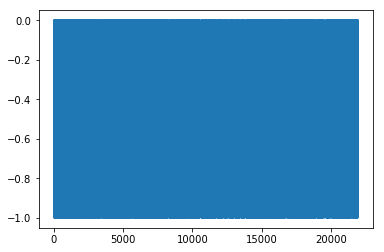

[0 0 0 ..., 0 0 0]


1254

In [37]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

ss = accuracy_score(y_test, y_pred)
print(ss)
plt.clf()
plt.plot(list(range(len(y_pred-y_test))),y_pred-y_test)
plt.show()
X_test.shape
print(y_pred)
y_test.sum()


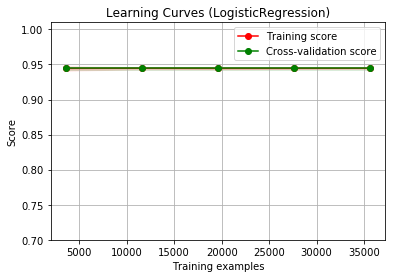

In [38]:
title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

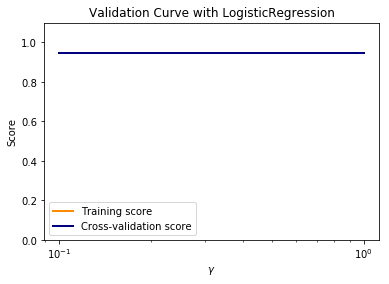

In [39]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import validation_curve

param_range = np.linspace(0.1, 1, 5)
train_scores, test_scores = validation_curve(
    linear_model.LogisticRegression(), X_train, y_train, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with LogisticRegression")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [40]:
data_test = pd.read_csv(r"C:\Laury\Tianchi_Tmall\data_format2\test_format2.csv")

In [41]:
data_test = data_test[data_test.label!=-1.0][data_test.age_range!=0][data_test.gender!=0]
dummies_Age = pd.get_dummies(data_test['age_range'], prefix= 'age')
dummies_Gender = pd.get_dummies(data_test['gender'], prefix= 'gender')
df_test = pd.concat([data_test, dummies_Age, dummies_Gender], axis=1)
df_test.drop(['age_range','gender'], axis=1, inplace=True)
df_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,user_id,merchant_id,label,activity_log,age_1.0,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,age_7.0,age_8.0,gender_1.0,gender_2.0
53,360576,1581,NaN,948181:614:4066:1111:2#1111020:614:4066:1111:2...,0,1,0,0,0,0,0,0,0,1
134,295296,3361,NaN,521280:1118:487:1111:0#521280:1118:487:1111:0#...,0,1,0,0,0,0,0,0,1,0
228,230016,1742,NaN,962700:464:7885:1111:2#144958:464:7885:1111:0#...,0,0,0,0,1,0,0,0,1,0
242,164736,598,NaN,974463:1188:6983:1111:2#974463:1188:8351:1111:0,0,0,1,0,0,0,0,0,1,0
243,164736,1963,NaN,647834:1023:6109:1111:2#647834:1023:6109:1111:...,0,0,1,0,0,0,0,0,1,0


In [ ]:
#age1 = np.zeros((len(df_test['age_2.0']),1))
#df_test.insert(4,'age_1.0',age1)
#df_test.head()

In [43]:
test = df_test.filter(regex='age_.*|gender_.*')
predictions = clf.predict(test)

result = pd.DataFrame({'userid':data_test['user_id'].as_matrix(), 'merchant_id':data_test['merchant_id'].as_matrix(), 'label':predictions.astype(np.int32)})
result.to_csv(r"C:\Laury\Tianchi_Tmall\data_format2\logistic_regression_predictions.csv", index=False)

In [46]:
print(result.label.describe())
np.unique(result.label)

count    69590.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: label, dtype: float64


array([0])

In [47]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
data_train = pd.read_csv(r"C:\Laury\Tianchi_Tmall\data_format2\train_format2.csv")


In [48]:
data_train.dropna(axis=0)
data_train[data_train.isnull().values==True].head()

,user_id,age_range,gender,merchant_id,label,activity_log
2521,182400,2.0,0.0,1519,-1,NaN
3623,190848,2.0,0.0,452,-1,NaN
8269,226176,NaN,NaN,1992,-1,547751:1349:7279:0902:0
8269,226176,NaN,NaN,1992,-1,547751:1349:7279:0902:0
8270,226176,NaN,NaN,487,-1,817592:1349:7532:0624:0#894236:36:7532:0624:0#...


In [49]:
data_train.dropna(axis=0)
data_train = data_train[data_train.label!=-1][data_train.age_range!=0][data_train.gender!=0][data_train.age_range.notnull()][data_train.gender.notnull()]
y = data_train.label
X = data_train.drop(['label','activity_log'],axis=1).filter(regex='user.*|age.*|gender.*|merch.*')
X[X.isnull().values==True]
X.dtypes
y=y.astype('float64')
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,user_id,age_range,gender,merchant_id
133,362112,4.0,1.0,2618
174,232320,4.0,1.0,1168
189,232320,4.0,1.0,4270
346,36480,6.0,1.0,4730
394,37248,3.0,1.0,2615


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:

rfc = RandomForestClassifier(n_estimators=100, criterion='gini')

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

0.937724932805


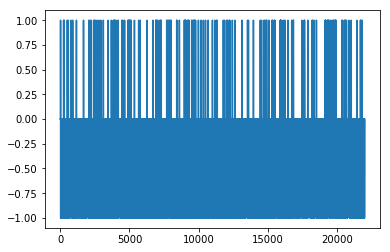

175.0


1228.0

In [55]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))

plt.clf()
plt.plot(list(range(len(y_pred-y_test))),y_pred-y_test)
plt.show()
X_test.shape
print(y_pred.sum())
y_test.sum()

In [56]:
data_test = pd.read_csv(r"C:\Laury\Tianchi_Tmall\data_format2\test_format2.csv")
print(data_test.head())

   user_id  age_range  gender  merchant_id  label  \
0   163968        0.0     0.0         4378   -1.0   
1   163968        0.0     0.0         2300   -1.0   
2   163968        0.0     0.0         1551   -1.0   
3   163968        0.0     0.0         4343   -1.0   
4   163968        0.0     0.0         4911   -1.0   

                                        activity_log  
0                             101206:812:6968:0614:0  
1  588758:844:3833:0618:0#71782:844:3833:1111:2#7...  
2  312747:243:1954:0627:0#312747:243:1954:0627:0#...  
3                            932390:1612:3201:0628:0  
4                             957657:662:3089:0612:0  


In [59]:
data_test = data_test[data_test.age_range!=0][data_test.gender!=0]
data_test = data_test[data_test.age_range.notnull()][data_test.gender.notnull()].dropna().filter(regex='user.*|age.*|gender.*|merch.*')
#data_test = data_test.iloc[:1000,:]
data_test.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(1554333, 4)

In [60]:
data_test.head()

,user_id,age_range,gender,merchant_id
21,360576,2.0,2.0,145
22,360576,2.0,2.0,75
23,360576,2.0,2.0,4160
24,360576,2.0,2.0,4321
25,360576,2.0,2.0,471


In [69]:

print(data_test.head())
predictions = rfc.predict(data_test)

result = pd.DataFrame({'UserID':data_test['user_id'].as_matrix(), 'merchant_id':data_test['merchant_id'].as_matrix(), 'label':predictions.astype(np.int32)})

    user_id  age_range  gender  merchant_id
21   360576        2.0     2.0          145
22   360576        2.0     2.0           75
23   360576        2.0     2.0         4160
24   360576        2.0     2.0         4321
25   360576        2.0     2.0          471


In [70]:
predictions.sum()

6110.0

In [63]:
6110.0/1554333

0.003930946586091912

In [71]:
result.head()

,UserID,label,merchant_id
0,360576,0,145
1,360576,0,75
2,360576,0,4160
3,360576,0,4321
4,360576,1,471


In [72]:
label=result['label']
result.drop(labels=['label'], axis=1,inplace = True)
result.insert(2,'label',label)
result.to_csv(r"C:\Laury\Tianchi_Tmall\data_format2\random_forest_predictions.csv", index=False)

In [73]:
result.label.sum()

6110

In [74]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554333 entries, 0 to 1554332
Data columns (total 3 columns):
UserID         1554333 non-null int64
merchant_id    1554333 non-null int64
label          1554333 non-null int32
dtypes: int32(1), int64(2)
memory usage: 29.6 MB
